# Project 3 - Predict the Weekly Direction of Royal Bank (RY.TO)

## Machine Learning Model

### A. Import Python Libraries

In [1]:
# Import the required libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Logistic Regression Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as lr
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

# Enable the Matplotlib property to allow diagrams to display in Jupyter Notebook
import matplotlib.pyplot as plt
%matplotlib inline

### B. Import Data

#### B1. Feature X Variables

##### B1.i. Import Feature X CSV File

In [2]:
# Read the CSV file into a Pandas DataFrame
# Set the index using the Ticker column
df_feature = pd.read_csv(
    Path("../Data/Feature_Engineering_RY.csv"), 
    index_col="Date"
)

##### B1.ii. Review Imported Data 

In [3]:
# Review the DataFrame
display(df_feature.columns)
display(df_feature.head())


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Mid_hl',
       'Mid_oc', 'Mid_hloc', 'Close_in_range', 'Returns_1Day_Moc',
       'Returns_5Day_Moc', 'Returns_30Day_Moc', 'Returns_1day_Mhloc',
       'Returns_5Day_Mhloc', 'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc',
       'Std_Dev_30Day_Moc', 'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc',
       'SMA_Returns_8Day_Mhloc', 'SMA_Returns_20Day_Mhloc',
       'SMA_Delta_8_20Day_Mhloc', 'SMA_Signal_8_20Day_Mhloc', 'high_slope',
       'high_intercept', 'mid_hl_slope', 'mid_hl_intercept', 'mid_oc_slope',
       'mid_oc_intercept', 'low_slope', 'low_intercept', 'trend_10day'],
      dtype='object')

,Open,High,Low,Close,Adj Close,Volume,Mid_hl,Mid_oc,Mid_hloc,Close_in_range,...,SMA_Signal_8_20Day_Mhloc,high_slope,high_intercept,mid_hl_slope,mid_hl_intercept,mid_oc_slope,mid_oc_intercept,low_slope,low_intercept,trend_10day
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02 00:00:00-05:00,71.300003,71.639999,70.779999,71.589996,49.878262,1576100,71.209999,71.445000,71.327499,0.941857,...,1,-0.020970,71.529333,-0.000273,71.150000,-0.015939,71.263666,0.020424,70.770666,0.0
2014-01-03 00:00:00-05:00,71.370003,71.459999,71.110001,71.389999,49.738911,1243400,71.285000,71.380001,71.332500,0.800000,...,1,-0.008849,71.434667,0.002273,71.127000,0.002758,71.135333,0.013394,70.819334,1.0
2014-01-06 00:00:00-05:00,71.449997,71.500000,70.610001,70.699997,49.258179,2737700,71.055000,71.074997,71.064999,0.101120,...,1,0.031758,71.269334,0.036273,70.970001,0.037121,70.958332,0.040788,70.670668,1.0
2014-01-07 00:00:00-05:00,71.000000,71.440002,70.970001,70.970001,49.446289,1374100,71.205002,70.985001,71.095001,0.000000,...,1,0.112727,70.960001,0.093576,70.785334,0.096606,70.759667,0.074424,70.610667,1.0
2014-01-08 00:00:00-05:00,70.959999,71.180000,70.669998,71.000000,49.467197,1293700,70.924999,70.980000,70.952499,0.647060,...,1,0.199939,70.671333,0.184333,70.473667,0.166152,70.572666,0.168727,70.276000,1.0


##### B1.iii. Create Feature X Variable Dataframe

In [4]:
df_feature_1 = df_feature
drop_colums_feature = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Mid_hl', 'Mid_oc', 'Mid_hloc',
                        'high_slope','high_intercept', 'mid_hl_slope', 'mid_hl_intercept', 'mid_oc_slope', 'mid_oc_intercept', 'low_slope', 'low_intercept', 'trend_10day']
df_feature_1 = df_feature_1.dropna()
df_feature_1 = df_feature_1.drop(columns = drop_colums_feature)


##### B1.iv. Review Feature X Variable Dataframe

In [5]:
# Review the DataFrame
print(f"Shape: {df_feature_1.shape}")
print(f"Columns/Features: {df_feature_1.columns}")
display(df_feature_1.head(10))
display(df_feature_1.tail(10))

Shape: (2218, 15)
Columns/Features: Index(['Close_in_range', 'Returns_1Day_Moc', 'Returns_5Day_Moc',
       'Returns_30Day_Moc', 'Returns_1day_Mhloc', 'Returns_5Day_Mhloc',
       'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc', 'Std_Dev_30Day_Moc',
       'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc', 'SMA_Returns_8Day_Mhloc',
       'SMA_Returns_20Day_Mhloc', 'SMA_Delta_8_20Day_Mhloc',
       'SMA_Signal_8_20Day_Mhloc'],
      dtype='object')


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc
Date,,,,,,,,,,,,,,,
2014-02-13 00:00:00-05:00,0.836363,0.006320,0.018177,-0.008188,0.005393,0.017632,-0.006765,0.891183,1.223474,0.921902,1.241195,0.006428,0.009194,-0.002766,0
2014-02-14 00:00:00-05:00,0.730769,0.004939,0.013017,-0.002382,0.004305,0.013641,-0.002558,0.995314,1.220107,1.015992,1.237814,0.005473,0.009210,-0.003738,0
2014-02-18 00:00:00-05:00,0.499994,0.003019,0.017958,0.004924,0.004041,0.018717,0.005242,1.019148,1.226557,1.017903,1.244777,0.005479,0.008794,-0.003314,0
2014-02-19 00:00:00-05:00,0.844038,0.007840,0.026670,0.014087,0.007874,0.025714,0.012729,0.973815,1.250676,0.978159,1.268316,0.004048,0.008785,-0.004736,0
2014-02-20 00:00:00-05:00,0.774196,0.009655,0.032166,0.023950,0.009097,0.031079,0.023995,0.952958,1.304198,0.946726,1.320947,0.003967,0.009036,-0.005069,0
2014-02-21 00:00:00-05:00,0.312490,-0.000275,0.025402,0.021797,0.000000,0.025549,0.023058,0.987963,1.351184,0.987256,1.368705,0.003652,0.007789,-0.004138,0
2014-02-24 00:00:00-05:00,0.487177,-0.001583,0.018747,0.017676,-0.001824,0.019290,0.017503,1.019471,1.387681,1.005187,1.404441,0.003834,0.007000,-0.003166,0
2014-02-25 00:00:00-05:00,0.581395,0.002826,0.018551,0.021698,0.002551,0.017778,0.020349,0.997325,1.431749,0.970955,1.446209,0.003868,0.006169,-0.002302,0
2014-02-26 00:00:00-05:00,0.078258,-0.002818,0.007779,0.019606,-0.002029,0.007778,0.019602,0.865112,1.464538,0.854652,1.479853,0.004425,0.006064,-0.001639,0


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc
Date,,,,,,,,,,,,,,,
2022-12-01 00:00:00-05:00,0.660871,0.002048,-0.001891,0.100781,0.004840,-0.003539,0.099158,0.800969,4.049628,0.854962,4.007213,0.005729,0.006431,-0.000702,0
2022-12-02 00:00:00-05:00,0.554693,-0.003827,-0.005711,0.089350,-0.002511,-0.006207,0.091845,0.694418,3.932232,0.789396,3.874786,0.005079,0.006234,-0.001155,0
2022-12-05 00:00:00-05:00,0.666662,-0.002947,-0.001718,0.071168,-0.003803,-0.003395,0.071487,0.530422,3.861155,0.646904,3.794274,0.004649,0.006155,-0.001505,0
2022-12-06 00:00:00-05:00,0.362638,-0.004601,-0.001613,0.081934,-0.005521,-0.000376,0.079710,0.644532,3.635665,0.767006,3.564341,0.004743,0.006325,-0.001582,0
2022-12-07 00:00:00-05:00,0.473683,-0.007404,-0.016643,0.065991,-0.006492,-0.013454,0.063366,0.875443,3.413968,0.948552,3.353637,0.005085,0.006593,-0.001508,0
2022-12-08 00:00:00-05:00,0.422676,-0.003105,-0.021700,0.053834,-0.003353,-0.021498,0.052066,1.041868,3.224969,1.080018,3.168328,0.004788,0.005575,-0.000788,0
2022-12-09 00:00:00-05:00,0.191921,-0.004368,-0.022231,0.046258,-0.003041,-0.022018,0.046941,1.188868,3.031804,1.150715,2.971275,0.004763,0.005315,-0.000552,0
2022-12-12 00:00:00-05:00,0.846564,0.005112,-0.014328,0.047634,0.003546,-0.014803,0.045251,1.234356,2.845687,1.171634,2.792659,0.004014,0.005441,-0.001427,0
2022-12-13 00:00:00-05:00,0.277312,0.000873,-0.008907,0.042332,-0.000532,-0.009861,0.040089,1.273007,2.685125,1.235233,2.627791,0.003847,0.005354,-0.001507,0


#### B2. Import Target Y Variable

#### B1.i. Import Target Y CSV File

In [6]:
# Read the CSV file into a Pandas DataFrame
# Set the index using the Ticker column
df_target = pd.read_csv(
    Path("../Data/Feature_Engineering_RY.csv"), 
    index_col="Date"
)

##### B1.iv. Review Target Y Variable Dataframe

In [7]:
# Review the DataFrame
df_target.head()

,Open,High,Low,Close,Adj Close,Volume,Mid_hl,Mid_oc,Mid_hloc,Close_in_range,...,SMA_Signal_8_20Day_Mhloc,high_slope,high_intercept,mid_hl_slope,mid_hl_intercept,mid_oc_slope,mid_oc_intercept,low_slope,low_intercept,trend_10day
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02 00:00:00-05:00,71.300003,71.639999,70.779999,71.589996,49.878262,1576100,71.209999,71.445000,71.327499,0.941857,...,1,-0.020970,71.529333,-0.000273,71.150000,-0.015939,71.263666,0.020424,70.770666,0.0
2014-01-03 00:00:00-05:00,71.370003,71.459999,71.110001,71.389999,49.738911,1243400,71.285000,71.380001,71.332500,0.800000,...,1,-0.008849,71.434667,0.002273,71.127000,0.002758,71.135333,0.013394,70.819334,1.0
2014-01-06 00:00:00-05:00,71.449997,71.500000,70.610001,70.699997,49.258179,2737700,71.055000,71.074997,71.064999,0.101120,...,1,0.031758,71.269334,0.036273,70.970001,0.037121,70.958332,0.040788,70.670668,1.0
2014-01-07 00:00:00-05:00,71.000000,71.440002,70.970001,70.970001,49.446289,1374100,71.205002,70.985001,71.095001,0.000000,...,1,0.112727,70.960001,0.093576,70.785334,0.096606,70.759667,0.074424,70.610667,1.0
2014-01-08 00:00:00-05:00,70.959999,71.180000,70.669998,71.000000,49.467197,1293700,70.924999,70.980000,70.952499,0.647060,...,1,0.199939,70.671333,0.184333,70.473667,0.166152,70.572666,0.168727,70.276000,1.0


##### B1.iii. Create Target Y Variable Dataframe

In [8]:
df_target_1 = df_target[['trend_10day']]

##### B1.iv. Review Target Y Variable Dataframe

In [9]:
# Review the DataFrame
print(f"Shape: {df_target_1.shape}")
print(f"Columns/Features: {df_target_1.columns}")
display(df_target_1.head(10))
display(df_target_1.tail(10))

Shape: (2258, 1)
Columns/Features: Index(['trend_10day'], dtype='object')


,trend_10day
Date,
2014-01-02 00:00:00-05:00,0.0
2014-01-03 00:00:00-05:00,1.0
2014-01-06 00:00:00-05:00,1.0
2014-01-07 00:00:00-05:00,1.0
2014-01-08 00:00:00-05:00,1.0
2014-01-09 00:00:00-05:00,1.0
2014-01-10 00:00:00-05:00,1.0
2014-01-13 00:00:00-05:00,1.0
2014-01-14 00:00:00-05:00,0.0


,trend_10day
Date,
2022-12-15 00:00:00-05:00,NaN
2022-12-16 00:00:00-05:00,NaN
2022-12-19 00:00:00-05:00,NaN
2022-12-20 00:00:00-05:00,NaN
2022-12-21 00:00:00-05:00,NaN
2022-12-22 00:00:00-05:00,NaN
2022-12-23 00:00:00-05:00,NaN
2022-12-28 00:00:00-05:00,NaN
2022-12-29 00:00:00-05:00,NaN


### C. Modeling

#### C1 Create Modeling Data Frame

##### C1.i. Concatinate Feature X and Target Y Dataframes

In [10]:
# Concatinate Data Frames
df_model = pd.concat([df_feature_1, df_target_1], axis="columns", join="inner")

##### C1.ii. Review Model Dataframe

In [11]:
# Review the DataFrame
print(f"Shape: {df_model.shape}")
print(f"Columns/Features: {df_model.columns}")
display(df_model.head(10))
display(df_model.tail(10))

Shape: (2218, 16)
Columns/Features: Index(['Close_in_range', 'Returns_1Day_Moc', 'Returns_5Day_Moc',
       'Returns_30Day_Moc', 'Returns_1day_Mhloc', 'Returns_5Day_Mhloc',
       'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc', 'Std_Dev_30Day_Moc',
       'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc', 'SMA_Returns_8Day_Mhloc',
       'SMA_Returns_20Day_Mhloc', 'SMA_Delta_8_20Day_Mhloc',
       'SMA_Signal_8_20Day_Mhloc', 'trend_10day'],
      dtype='object')


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc,trend_10day
Date,,,,,,,,,,,,,,,,
2014-02-13 00:00:00-05:00,0.836363,0.006320,0.018177,-0.008188,0.005393,0.017632,-0.006765,0.891183,1.223474,0.921902,1.241195,0.006428,0.009194,-0.002766,0,1.0
2014-02-14 00:00:00-05:00,0.730769,0.004939,0.013017,-0.002382,0.004305,0.013641,-0.002558,0.995314,1.220107,1.015992,1.237814,0.005473,0.009210,-0.003738,0,1.0
2014-02-18 00:00:00-05:00,0.499994,0.003019,0.017958,0.004924,0.004041,0.018717,0.005242,1.019148,1.226557,1.017903,1.244777,0.005479,0.008794,-0.003314,0,1.0
2014-02-19 00:00:00-05:00,0.844038,0.007840,0.026670,0.014087,0.007874,0.025714,0.012729,0.973815,1.250676,0.978159,1.268316,0.004048,0.008785,-0.004736,0,0.0
2014-02-20 00:00:00-05:00,0.774196,0.009655,0.032166,0.023950,0.009097,0.031079,0.023995,0.952958,1.304198,0.946726,1.320947,0.003967,0.009036,-0.005069,0,0.0
2014-02-21 00:00:00-05:00,0.312490,-0.000275,0.025402,0.021797,0.000000,0.025549,0.023058,0.987963,1.351184,0.987256,1.368705,0.003652,0.007789,-0.004138,0,0.0
2014-02-24 00:00:00-05:00,0.487177,-0.001583,0.018747,0.017676,-0.001824,0.019290,0.017503,1.019471,1.387681,1.005187,1.404441,0.003834,0.007000,-0.003166,0,0.0
2014-02-25 00:00:00-05:00,0.581395,0.002826,0.018551,0.021698,0.002551,0.017778,0.020349,0.997325,1.431749,0.970955,1.446209,0.003868,0.006169,-0.002302,0,0.0
2014-02-26 00:00:00-05:00,0.078258,-0.002818,0.007779,0.019606,-0.002029,0.007778,0.019602,0.865112,1.464538,0.854652,1.479853,0.004425,0.006064,-0.001639,0,0.0


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc,trend_10day
Date,,,,,,,,,,,,,,,,
2022-12-01 00:00:00-05:00,0.660871,0.002048,-0.001891,0.100781,0.004840,-0.003539,0.099158,0.800969,4.049628,0.854962,4.007213,0.005729,0.006431,-0.000702,0,0.0
2022-12-02 00:00:00-05:00,0.554693,-0.003827,-0.005711,0.089350,-0.002511,-0.006207,0.091845,0.694418,3.932232,0.789396,3.874786,0.005079,0.006234,-0.001155,0,0.0
2022-12-05 00:00:00-05:00,0.666662,-0.002947,-0.001718,0.071168,-0.003803,-0.003395,0.071487,0.530422,3.861155,0.646904,3.794274,0.004649,0.006155,-0.001505,0,0.0
2022-12-06 00:00:00-05:00,0.362638,-0.004601,-0.001613,0.081934,-0.005521,-0.000376,0.079710,0.644532,3.635665,0.767006,3.564341,0.004743,0.006325,-0.001582,0,0.0
2022-12-07 00:00:00-05:00,0.473683,-0.007404,-0.016643,0.065991,-0.006492,-0.013454,0.063366,0.875443,3.413968,0.948552,3.353637,0.005085,0.006593,-0.001508,0,0.0
2022-12-08 00:00:00-05:00,0.422676,-0.003105,-0.021700,0.053834,-0.003353,-0.021498,0.052066,1.041868,3.224969,1.080018,3.168328,0.004788,0.005575,-0.000788,0,0.0
2022-12-09 00:00:00-05:00,0.191921,-0.004368,-0.022231,0.046258,-0.003041,-0.022018,0.046941,1.188868,3.031804,1.150715,2.971275,0.004763,0.005315,-0.000552,0,0.0
2022-12-12 00:00:00-05:00,0.846564,0.005112,-0.014328,0.047634,0.003546,-0.014803,0.045251,1.234356,2.845687,1.171634,2.792659,0.004014,0.005441,-0.001427,0,0.0
2022-12-13 00:00:00-05:00,0.277312,0.000873,-0.008907,0.042332,-0.000532,-0.009861,0.040089,1.273007,2.685125,1.235233,2.627791,0.003847,0.005354,-0.001507,0,0.0


#### C2. Modeling Dataframe

##### C2.i. Split Model Dataframe into Train (4 Years) and Test (1 Year) Dataframes  

In [12]:
# Train Test Split
df_model = df_model.dropna()

# Train 2014 through 2017
df_train = df_model.loc['2014-01-01':'2017-12-31']

# Test 2018
df_test = df_model.loc['2018-01-01':'2018-12-31']

##### C2.ii. Split The Training dataframe into Feature X and Target Y dataframes

In [13]:
# Training: Set X and Y variables for model
Y_Train = df_train[['trend_10day']]
X_Train = df_train.drop(columns = ['trend_10day'])


##### C2.iii Review Training Data frames 

In [14]:
# Review training data
print(f"df_train X - Shape: {X_Train.shape} Columns/Features: {X_Train.columns}")
display(X_Train.head(5))

print(f"\ndf_train y - Shape: {Y_Train.shape} Columns/Features: {Y_Train.columns}")
display(Y_Train.head(5))

df_train X - Shape: (973, 15) Columns/Features: Index(['Close_in_range', 'Returns_1Day_Moc', 'Returns_5Day_Moc',
       'Returns_30Day_Moc', 'Returns_1day_Mhloc', 'Returns_5Day_Mhloc',
       'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc', 'Std_Dev_30Day_Moc',
       'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc', 'SMA_Returns_8Day_Mhloc',
       'SMA_Returns_20Day_Mhloc', 'SMA_Delta_8_20Day_Mhloc',
       'SMA_Signal_8_20Day_Mhloc'],
      dtype='object')


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc
Date,,,,,,,,,,,,,,,
2014-02-13 00:00:00-05:00,0.836363,0.006320,0.018177,-0.008188,0.005393,0.017632,-0.006765,0.891183,1.223474,0.921902,1.241195,0.006428,0.009194,-0.002766,0
2014-02-14 00:00:00-05:00,0.730769,0.004939,0.013017,-0.002382,0.004305,0.013641,-0.002558,0.995314,1.220107,1.015992,1.237814,0.005473,0.009210,-0.003738,0
2014-02-18 00:00:00-05:00,0.499994,0.003019,0.017958,0.004924,0.004041,0.018717,0.005242,1.019148,1.226557,1.017903,1.244777,0.005479,0.008794,-0.003314,0
2014-02-19 00:00:00-05:00,0.844038,0.007840,0.026670,0.014087,0.007874,0.025714,0.012729,0.973815,1.250676,0.978159,1.268316,0.004048,0.008785,-0.004736,0
2014-02-20 00:00:00-05:00,0.774196,0.009655,0.032166,0.023950,0.009097,0.031079,0.023995,0.952958,1.304198,0.946726,1.320947,0.003967,0.009036,-0.005069,0



df_train y - Shape: (973, 1) Columns/Features: Index(['trend_10day'], dtype='object')


,trend_10day
Date,
2014-02-13 00:00:00-05:00,1.0
2014-02-14 00:00:00-05:00,1.0
2014-02-18 00:00:00-05:00,1.0
2014-02-19 00:00:00-05:00,0.0
2014-02-20 00:00:00-05:00,0.0


##### C2.iv. Create Test Dataframes

In [15]:
# Training: Set X and Y variables for model
Y_Test = df_test[['trend_10day']]
X_Test = df_test.drop(columns = ['trend_10day'])


##### C2.v. Review Test Dataframes

In [16]:
# Review Testing
print(f"df_test X - Shape: {X_Test.shape} Columns/Features: {X_Test.columns}")
display(X_Test.head(5))

print(f"\ndf_test Shape: {Y_Test.shape} Columns/Features: {Y_Test.columns}")
display(Y_Test.head(5))


df_test X - Shape: (250, 15) Columns/Features: Index(['Close_in_range', 'Returns_1Day_Moc', 'Returns_5Day_Moc',
       'Returns_30Day_Moc', 'Returns_1day_Mhloc', 'Returns_5Day_Mhloc',
       'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc', 'Std_Dev_30Day_Moc',
       'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc', 'SMA_Returns_8Day_Mhloc',
       'SMA_Returns_20Day_Mhloc', 'SMA_Delta_8_20Day_Mhloc',
       'SMA_Signal_8_20Day_Mhloc'],
      dtype='object')


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc
Date,,,,,,,,,,,,,,,
2018-01-02 00:00:00-05:00,0.973679,0.001218,0.001559,0.024931,0.001487,0.000487,0.023754,0.307139,0.709221,0.272016,0.696701,0.002557,0.003579,-0.001022,0
2018-01-03 00:00:00-05:00,0.737705,0.006519,0.007843,0.026698,0.008181,0.008549,0.027366,0.330432,0.749144,0.351272,0.741499,0.003079,0.003765,-0.000685,0
2018-01-04 00:00:00-05:00,0.830769,0.011939,0.024016,0.038080,0.010119,0.022890,0.035526,0.694965,0.888984,0.682565,0.874053,0.004946,0.004400,0.000545,0
2018-01-05 00:00:00-05:00,0.586950,0.001337,0.022684,0.035720,0.001817,0.022672,0.035024,0.917208,1.018783,0.904191,0.999081,0.004734,0.004063,0.000672,0
2018-01-08 00:00:00-05:00,0.054796,-0.001574,0.019532,0.034038,-0.001098,0.020628,0.033735,1.026236,1.107673,1.018098,1.088426,0.004908,0.004126,0.000782,0



df_test Shape: (250, 1) Columns/Features: Index(['trend_10day'], dtype='object')


,trend_10day
Date,
2018-01-02 00:00:00-05:00,1.0
2018-01-03 00:00:00-05:00,1.0
2018-01-04 00:00:00-05:00,1.0
2018-01-05 00:00:00-05:00,1.0
2018-01-08 00:00:00-05:00,1.0


##### C2.vi. Convert Target Y df to Series

In [17]:
# Convert Y variables from Dataframe to Series
Y_Test = Y_Test['trend_10day']
Y_Train = Y_Train['trend_10day']


#### C3. Create Logistic Regression Model

##### C3.i Create Model

In [18]:
# Create Model
classifier = lr(solver='lbfgs', random_state = 1)
classifier.fit(X_Train, Y_Train)
predictions_train=classifier.predict(X_Train)
predictions_test=classifier.predict(X_Test)


##### C3.ii Create Model Predictions

In [19]:
# Add predictions to Datadrame            
df_prediction_train = pd.DataFrame({"prediction":predictions_train,"actual":Y_Train} )
df_prediction_test = pd.DataFrame({"prediction":predictions_test,"actual":Y_Test} )


#### C4. Model Performance

##### C4.i. Classification Report

In [20]:
# Logistic Regression reports
Test_Report = classification_report_imbalanced(Y_Test,predictions_test)
print(f"Classification Report:\n {Test_Report}") 


Classification Report:
                    pre       rec       spe        f1       geo       iba       sup

        0.0       0.48      0.12      0.86      0.20      0.33      0.10       130
        1.0       0.47      0.86      0.12      0.61      0.33      0.11       120

avg / total       0.48      0.48      0.51      0.40      0.33      0.11       250



##### C4.ii. Confusion Matrix

In [21]:
# Confusion Matrix
Test_Matrix = confusion_matrix(Y_Test,predictions_test)
print(f"Confusion Matrix:\n {Test_Matrix}") 


Confusion Matrix:
 [[ 16 114]
 [ 17 103]]


##### C4.iii. Accuracy, Recall, and Precision

In [22]:
# Accuracy
train_accuracy =  accuracy_score(df_prediction_train['actual'], df_prediction_train['prediction'])
test_accuracy =  accuracy_score(df_prediction_test['actual'], df_prediction_test['prediction'])

# Recall
train_recall = recall_score(df_prediction_train['actual'], df_prediction_train['prediction'], average=None)
test_recall = recall_score(df_prediction_test['actual'], df_prediction_test['prediction'], average=None)

# Precision   
train_precision = precision_score(df_prediction_train['actual'], df_prediction_train['prediction'], average=None)
test_precision = precision_score(df_prediction_test['actual'], df_prediction_test['prediction'], average=None)

df_performance = pd.DataFrame({"train_accuracy":train_accuracy, "train_reall_0":train_recall[0], "train_reall_1":train_recall[1], "train_precision_0":train_precision[0], "train_precision_1":train_precision[1]
                               , "test_accuracy":test_accuracy, "test_recall_0":test_recall[0], "test_recall_1":test_recall[1], "test_precision_0":test_precision[0], "test_precision_1":test_precision[1]}, index = ['RY'])

print(f"\nPerformace Meaures:\n")
display(df_performance) 


Performace Meaures:



,train_accuracy,train_reall_0,train_reall_1,train_precision_0,train_precision_1,test_accuracy,test_recall_0,test_recall_1,test_precision_0,test_precision_1
RY,0.585817,0.144928,0.912343,0.550459,0.590278,0.476,0.123077,0.858333,0.484848,0.474654


##### C4.iv. Prediction Dataframe

In [23]:
# Display Predictions
display(df_prediction_test)

,prediction,actual
Date,,
2018-01-02 00:00:00-05:00,1.0,1.0
2018-01-03 00:00:00-05:00,1.0,1.0
2018-01-04 00:00:00-05:00,1.0,1.0
2018-01-05 00:00:00-05:00,1.0,1.0
2018-01-08 00:00:00-05:00,1.0,1.0
...,...,...
2018-12-20 00:00:00-05:00,1.0,1.0
2018-12-21 00:00:00-05:00,1.0,1.0
2018-12-24 00:00:00-05:00,1.0,1.0


##### C4.v. Actual vs Predictied Trend 

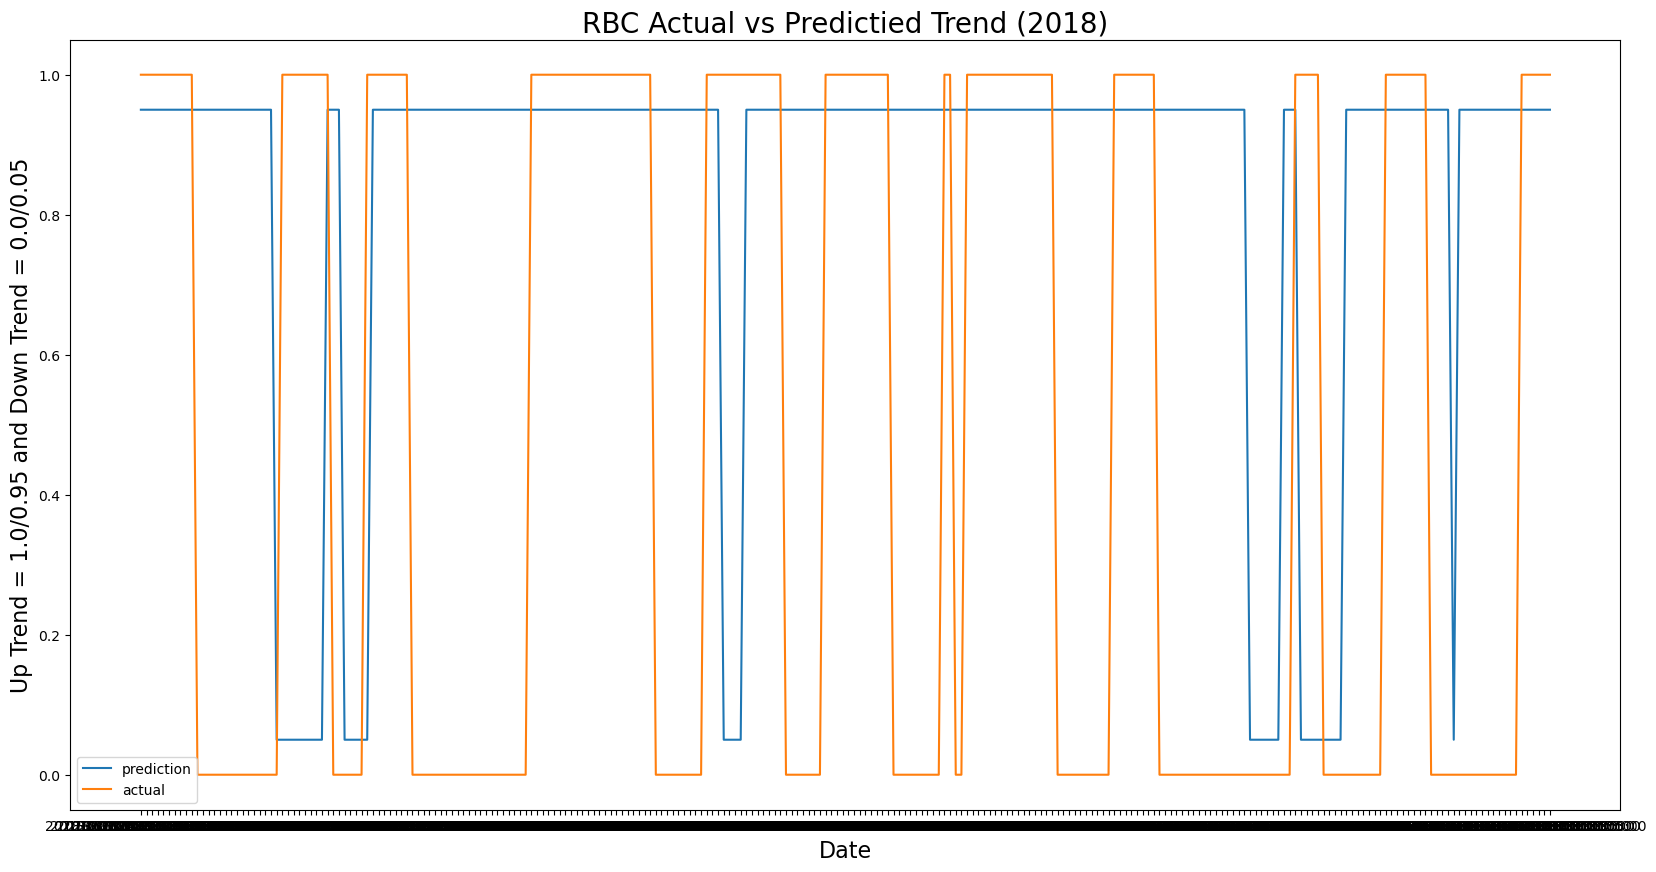

In [24]:
# Create temp df to improve chart readability
df_temp = df_prediction_test.copy()
#df['First Season'] = np.where(df['First Season'] > 1990, 1, df['First Season'])
df_temp['prediction'] = np.where(df_temp['prediction'] == 1, .95, .05)

# Plot daily returns of all portfolios
fig = plt.figure(figsize=(20,10))

plt.plot(df_temp)
plt.title("RBC Actual vs Predictied Trend (2018)", fontsize = 20)
plt.ylabel("Up Trend = 1.0/0.95 and Down Trend = 0.0/0.05", fontsize = 16)
plt.xlabel("Date", fontsize = 16)
plt.legend(df_temp.columns)

plt.show()

# Delete Temp Dataframe
del(df_temp)

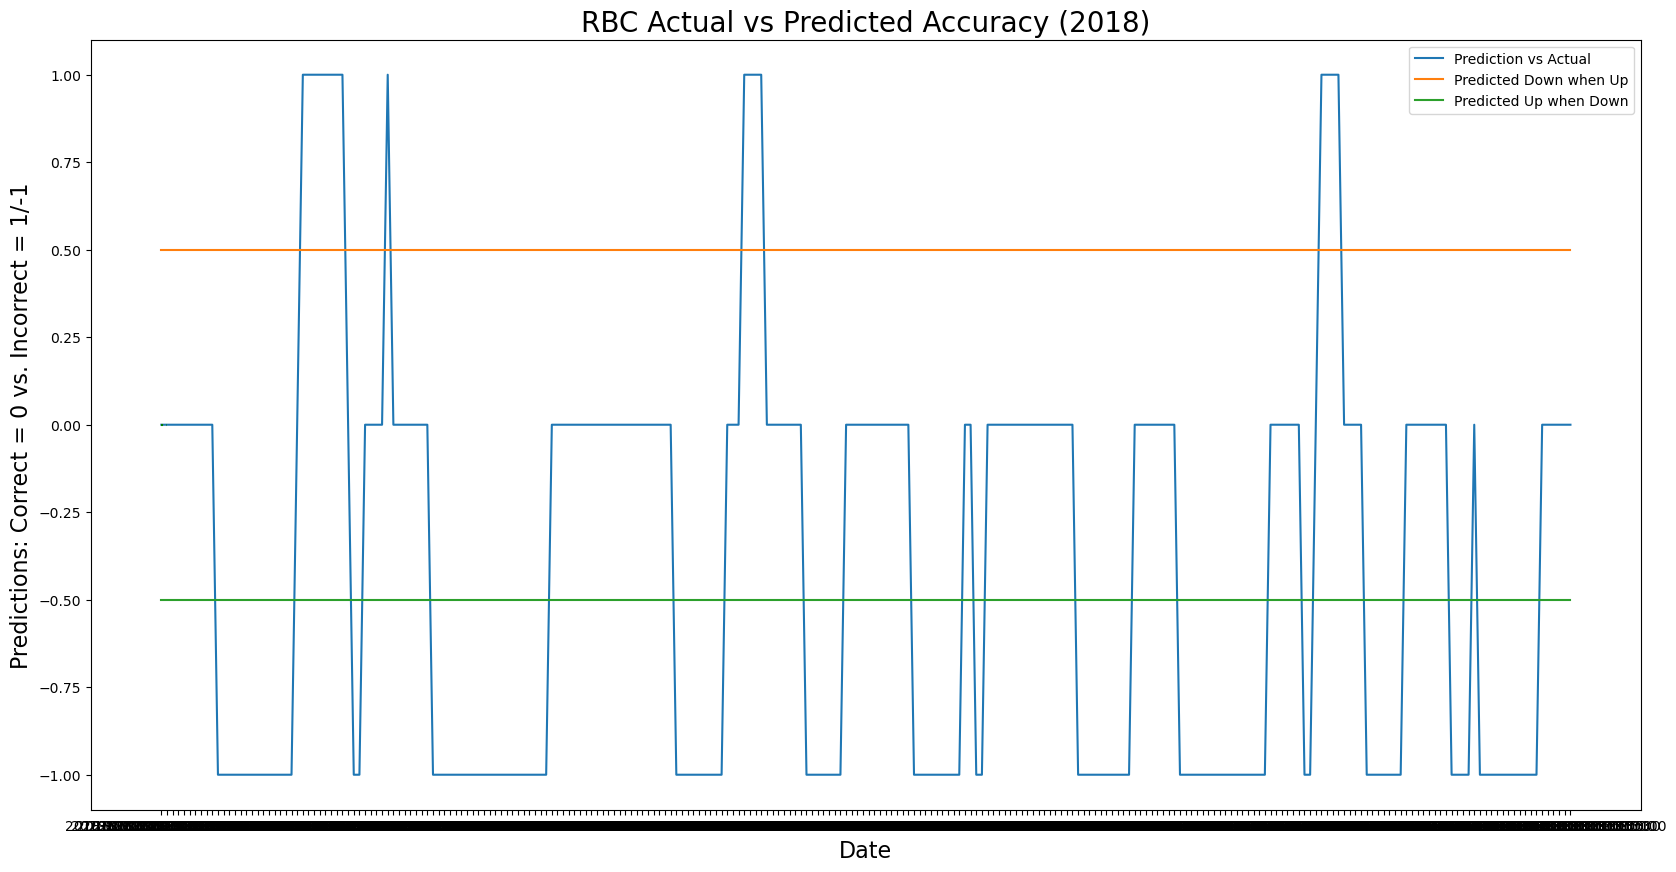

In [25]:
# Create temp df to improve chart readability
df_temp = df_prediction_test.copy()
#df['First Season'] = np.where(df['First Season'] > 1990, 1, df['First Season'])
df_temp['Prediction vs Actual'] = np.where(df_temp['prediction'] == df_temp['actual'], 0,
                                 np.where(df_temp['prediction'] < df_temp['actual'], 1, -1))
df_temp['Predicted Down when Up'] = .5
#df_temp['Predicted Correct'] = 0
df_temp['Predicted Up when Down'] = -.5
df_temp = df_temp.drop(columns = ['prediction', 'actual'])

# Plot daily returns of all portfolios
fig = plt.figure(figsize=(20,10))

plt.plot(df_temp)
plt.title("RBC Actual vs Predicted Accuracy (2018)", fontsize = 20)
plt.plot([0,0], linestyle=':', color='green', label='Perfect Classifier')
plt.ylabel("Predictions: Correct = 0 vs. Incorrect = 1/-1", fontsize = 16)
plt.xlabel("Date", fontsize = 16)
plt.legend(df_temp.columns,loc = 'upper right')

plt.show()

# Delete Temp Dataframe
del(df_temp)

##### C4.vi. Trend Prediction (1 Month)

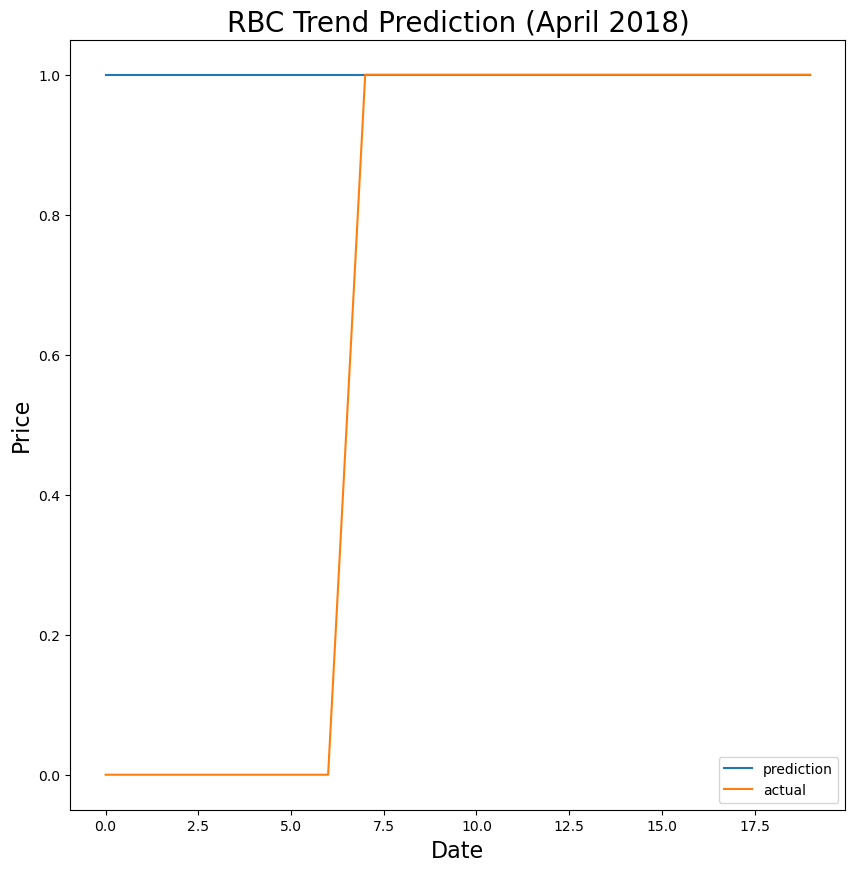

In [26]:
# Data April 2018
df_plt2 = df_prediction_test.loc['2018-04-01':'2018-04-30']
df_plt2 = df_plt2.reset_index()
df_plt2 = df_plt2.drop(columns = ['Date'])
df_plt2.columns

# Plot daily returns of all portfolios
fig = plt.figure(figsize=(10,10))

plt.plot(df_plt2)
plt.title("RBC Trend Prediction (April 2018)", fontsize = 20)
plt.ylabel("Price", fontsize = 16)
plt.xlabel("Date", fontsize = 16)
plt.legend(df_plt2.columns)
#plt.grid()

plt.show()

##### C4.vii. Receiver Operating Characteristic (ROC)

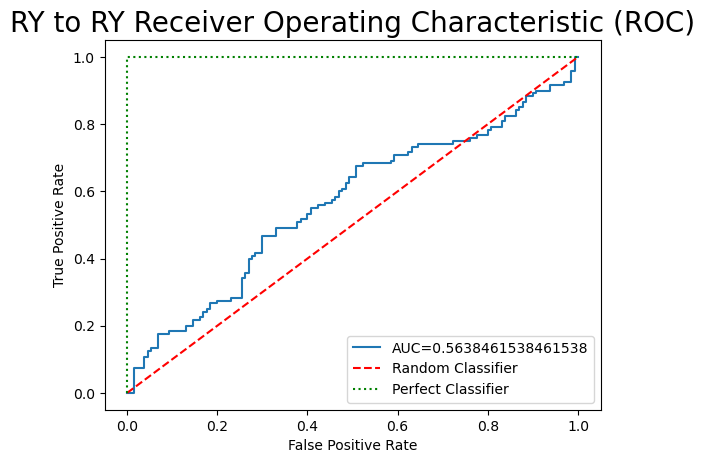

In [27]:
X_test = X_Test
y_test = Y_Test
y_pred_proba = predictions_test
log_regression = classifier

#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.title("RY to RY Receiver Operating Characteristic (ROC)", fontsize = 20)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()